# Jupyter notebook to play with the Lorenz system for the OpenPlant project.

$$
\begin {array}{ccl}
\dot{x}& = & \sigma(y-x)\\
\dot{y}& = & x(\rho-z)-y\\
\dot{z}& = & xy-\beta z
\end {array}
$$


In [31]:
def RK(xn,yn,zn,par,h):
    #par[0]=sigma
    #par[1]=rho
    #par[2]=beta
    
    kx1=par[0]*(yn-xn)
    ky1=xn*(par[2]-zn)-yn
    kz1=xn*yn-par[1]*zn
    
    kx2=par[0]*(  (yn+(0.5*h*ky1))  - (xn+(0.5*h*kx1)) )
    ky2=(xn+0.5*h*kx1)*(par[2] - (zn+ (0.5*h*kz1) )        ) - (yn+(0.5*h*ky1))
    kz2=( xn+(0.5*h*kx1) )*(yn+(0.5*h*ky1))-par[1]*(zn+ (0.5*h*kz1))
    
    kx3=par[0]*(  (yn+(0.5*h*ky2))  - (xn+(0.5*h*kx2)) )
    ky3=(xn+0.5*h*kx2)*(par[2] - (zn+ (0.5*h*kz2) )        ) - (yn+(0.5*h*ky2))
    kz3=( xn+(0.5*h*kx2) )*(yn+(0.5*h*ky2))-par[1]*(zn+ (0.5*h*kz2))
    
    kx4=par[0]*(  (yn+(h*ky3))  - (xn+(h*kx3)) )
    ky4=(xn+h*kx3)*(par[2] - (zn+ (h*kz3) )        ) - (yn+(h*ky3))
    kz4=( xn+(h*kx3) )*(yn+(h*ky3))-par[1]*(zn+ (h*kz3))
    
    x=xn+(h/6.0)*(kx1+2.0*kx2+2.0*kx3+kx4)
    y=yn+(h/6.0)*(ky1+2.0*ky2+2.0*ky3+ky4)
    z=zn+(h/6.0)*(kz1+2.0*kz2+2.0*kz3+kz4)
    return [x,y,z]

In [32]:
to=0 #initial time
tf=50 #final time

sigma=10.0
beta=8.0/3.0
rho=28.0
par=[sigma,beta,rho]
dt=0.001
tp=0.01

t=to
xo=2.1
yo=0.1
zo=0.1

xplt=[]
yplt=[]
zplt=[]
tplt=[]

tplt.append(t)
xplt.append(xo)
yplt.append(yo)
zplt.append(zo)
xold=[xo,yo,zo]

while t<tf:
    xnew=[]
    xnew=RK(xold[0],xold[1],xold[2],par,dt)
    if t>tp:
        tplt.append(t)
        xplt.append(xnew[0])
        yplt.append(xnew[1])
        zplt.append(xnew[2])
        #print tp
        tp+=0.01
        
    t+=dt
    xold=[xnew[0],xnew[1],xnew[2]]
print("DONE")

DONE


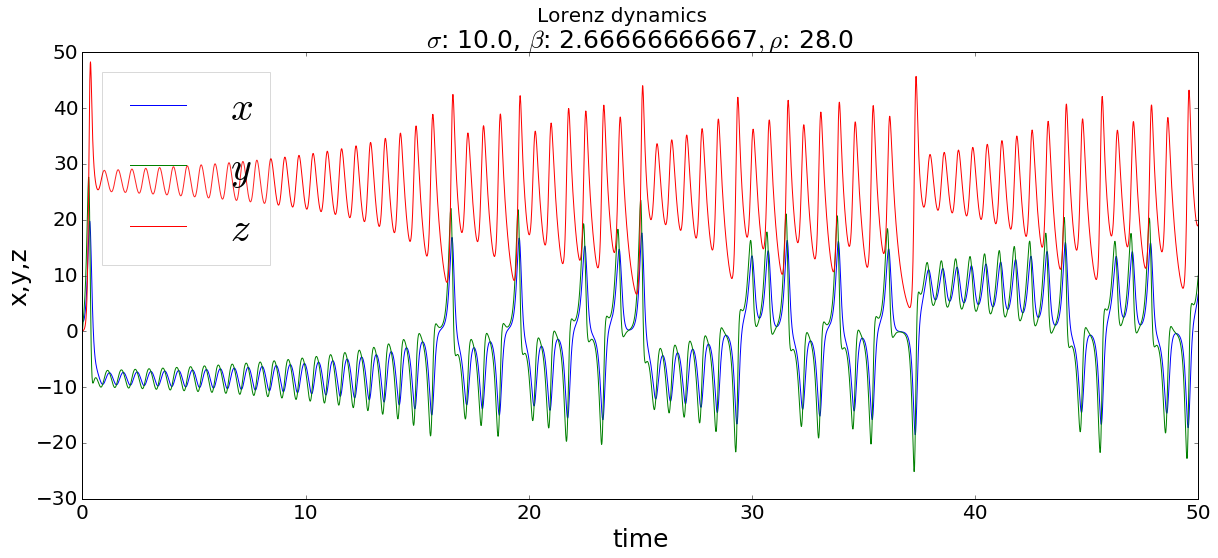

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

fig, axes = plt.subplots(1,1,figsize=(20, 8))

st = fig.suptitle("Lorenz dynamics", fontsize=20)
subt = axes.set_title("$\sigma$: "+str(sigma)+", $\\beta$: "+str(beta)+"$, \\rho$: "+str(rho),fontsize=25)
#subt = axes.set_title("$\sigma$: "+str(sigma)+", $\beta$: "+str(beta)+", $\rho$: "+str(rho)+", fontsize=15)
axes.set_xlabel("time",fontsize=25)
axes.set_ylabel("x,y,z",fontsize=25)
axes.xaxis.set_tick_params(labelsize=20)
axes.yaxis.set_tick_params(labelsize=20)
#axes.set_ylim([0,1.1])
axes.plot(tplt,xplt,"-",label="$x$")
axes.plot(tplt,yplt,"-",label='$y$')
axes.plot(tplt,zplt,"-",label='$z$')
fig.patch.set_alpha(0.5)
# Now add the legend with some customizations.
legend = axes.legend(loc='best', fontsize=40,framealpha=0.15)
#fig.savefig('r.svg',format='svg',dpi=600, bbox_inches='tight')
fig.savefig('xyzt.png',format='png',dpi=600, bbox_inches='tight')

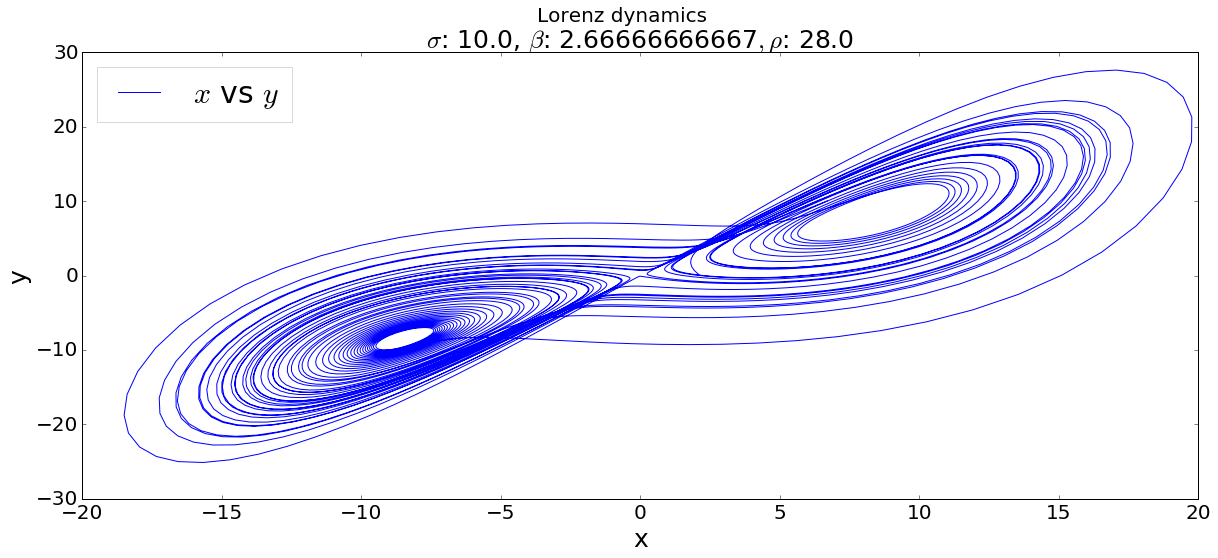

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

fig, axes = plt.subplots(1,1,figsize=(20, 8))

st = fig.suptitle("Lorenz dynamics", fontsize=20)
subt = axes.set_title("$\sigma$: "+str(sigma)+", $\\beta$: "+str(beta)+"$, \\rho$: "+str(rho),fontsize=25)
#subt = axes.set_title("$\sigma$: "+"$\\beta$: "+"$\\rho$: ",fontsize=25)
axes.set_xlabel("x",fontsize=25)
axes.set_ylabel("y",fontsize=25)
axes.xaxis.set_tick_params(labelsize=20)
axes.yaxis.set_tick_params(labelsize=20)
#axes.set_ylim([0,1.1])
axes.plot(xplt,yplt,"-",label="$x$ vs $y$")
#axes.plot(tplt,yplt,"-",label='$y$')
#axes.plot(tplt,zplt,"-",label='$z$')
fig.patch.set_alpha(0.5)
# Now add the legend with some customizations.
legend = axes.legend(loc='best', fontsize=30,framealpha=0.15)
#fig.savefig('r.svg',format='svg',dpi=600, bbox_inches='tight')
fig.savefig('xychaos.png',format='png',dpi=600, bbox_inches='tight')

5000 5000


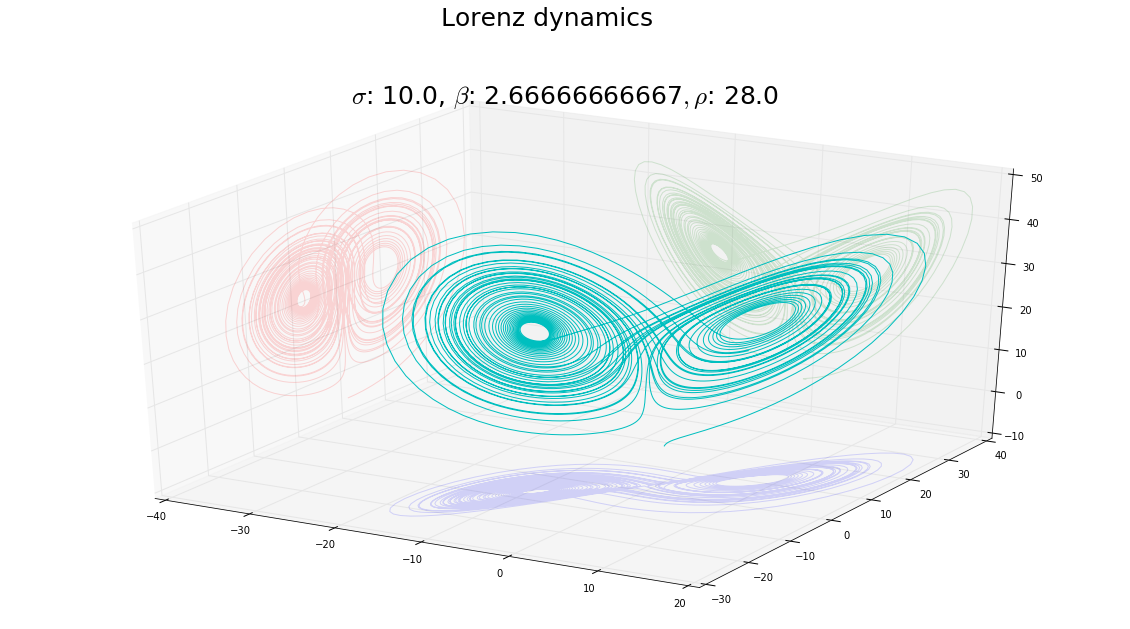

In [38]:
pz=len(tplt)*[-10.0]
px=len(tplt)*[-35.0]
py=len(tplt)*[35.0]

print len(pz), len(tplt)
#raw_input()
import matplotlib as mpl
import six
from mpl_toolkits.mplot3d import Axes3D
import six
#import numpy as np
#import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

st = fig.suptitle("Lorenz dynamics", fontsize=25)
plt.title("$\sigma$: "+str(sigma)+", $\\beta$: "+str(beta)+"$, \\rho$: "+str(rho),fontsize=25)
#plt.plot(xplt, yplt, zplt)
plt.plot(xplt, yplt, pz,alpha=0.15 )
plt.plot(xplt, py , zplt, alpha=0.15 )
plt.plot(px, yplt , zplt,alpha=0.15 )
plt.plot(xplt, yplt, zplt)
#ax.legend()
fig.savefig('xyzchaos.png',format='png',dpi=600, bbox_inches='tight')

# Periodic Case

In [39]:
to=0 #initial time
tf=50 #final time

sigma=10.0
beta=8.0/3.0
rho=300.5
par=[sigma,beta,rho]
dt=0.001
tp=5.0

t=to
xo=2.1
yo=0.1
zo=0.1

xplt=[]
yplt=[]
zplt=[]
tplt=[]

#tplt.append(t)
#xplt.append(xo)
#yplt.append(yo)
#zplt.append(zo)
xold=[xo,yo,zo]
#xold=[]
while t<tf:
    xnew=[]
    xnew=RK(xold[0],xold[1],xold[2],par,dt)
    if t>tp:
        tplt.append(t)
        xplt.append(xnew[0])
        yplt.append(xnew[1])
        zplt.append(xnew[2])
        #print tp
        tp+=0.01
        
    t+=dt
    xold=[xnew[0],xnew[1],xnew[2]]
print("DONE")

DONE


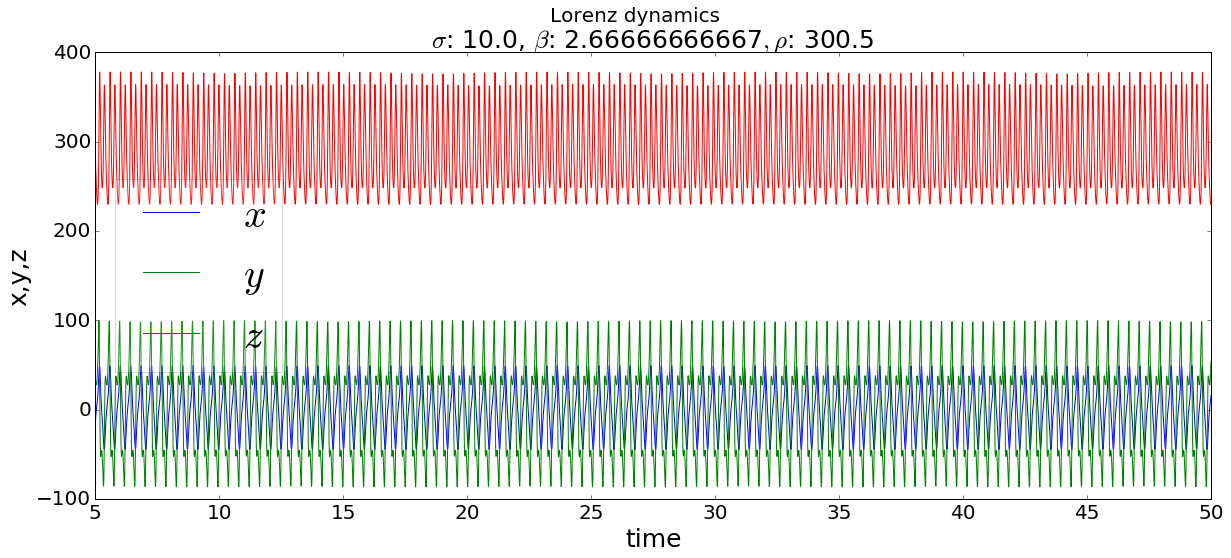

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

fig, axes = plt.subplots(1,1,figsize=(20, 8))

st = fig.suptitle("Lorenz dynamics", fontsize=20)
subt = axes.set_title("$\sigma$: "+str(sigma)+", $\\beta$: "+str(beta)+"$, \\rho$: "+str(rho),fontsize=25)
#subt = axes.set_title("$\sigma$: "+str(sigma)+", $\beta$: "+str(beta)+", $\rho$: "+str(rho)+", fontsize=15)
axes.set_xlabel("time",fontsize=25)
axes.set_ylabel("x,y,z",fontsize=25)
axes.xaxis.set_tick_params(labelsize=20)
axes.yaxis.set_tick_params(labelsize=20)
#axes.set_ylim([0,1.1])
axes.plot(tplt,xplt,"-",label="$x$")
axes.plot(tplt,yplt,"-",label='$y$')
axes.plot(tplt,zplt,"-",label='$z$')
fig.patch.set_alpha(0.5)
# Now add the legend with some customizations.
legend = axes.legend(loc='best', fontsize=40, framealpha=0.15)
#fig.savefig('r.svg',format='svg',dpi=600, bbox_inches='tight')
fig.savefig('xyznct.png',format='png',dpi=600, bbox_inches='tight')

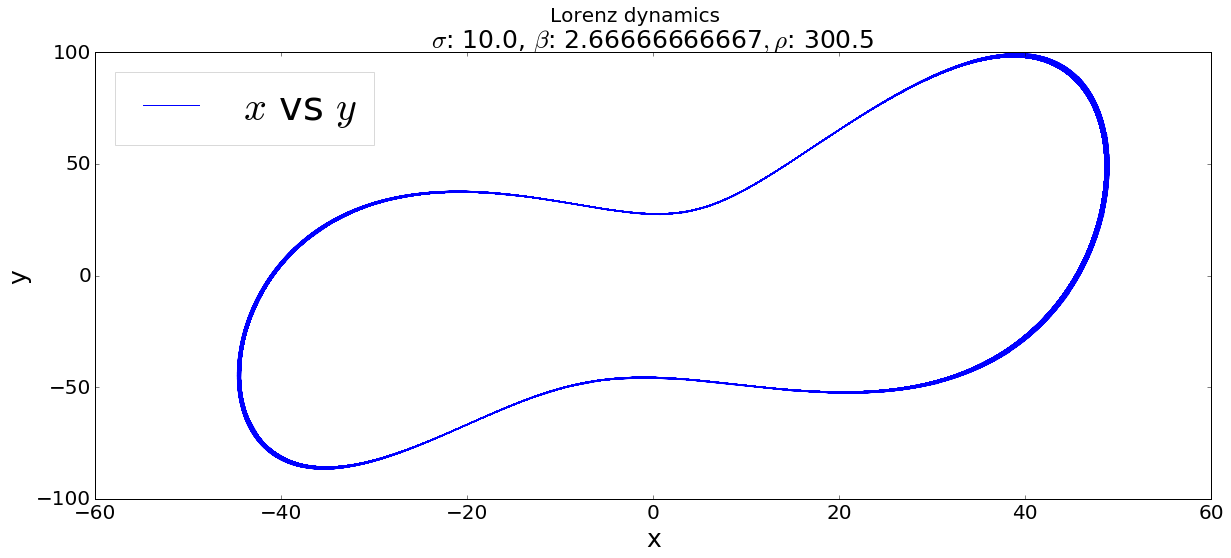

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

fig, axes = plt.subplots(1,1,figsize=(20, 8))

st = fig.suptitle("Lorenz dynamics", fontsize=20)
subt = axes.set_title("$\sigma$: "+str(sigma)+", $\\beta$: "+str(beta)+"$, \\rho$: "+str(rho),fontsize=25)
#subt = axes.set_title("$\sigma$: "+"$\\beta$: "+"$\\rho$: ",fontsize=25)
axes.set_xlabel("x",fontsize=25)
axes.set_ylabel("y",fontsize=25)
axes.xaxis.set_tick_params(labelsize=20)
axes.yaxis.set_tick_params(labelsize=20)
#axes.set_ylim([0,1.1])
axes.plot(xplt,yplt,"-",label="$x$ vs $y$")
#axes.plot(tplt,yplt,"-",label='$y$')
#axes.plot(tplt,zplt,"-",label='$z$')
fig.patch.set_alpha(0.5)
# Now add the legend with some customizations.
legend = axes.legend(loc='best', fontsize=40,framealpha=0.15)
#fig.savefig('r.svg',format='svg',dpi=600, bbox_inches='tight')
fig.savefig('xynochaos.png',format='png',dpi=600, bbox_inches='tight')

4500 4500


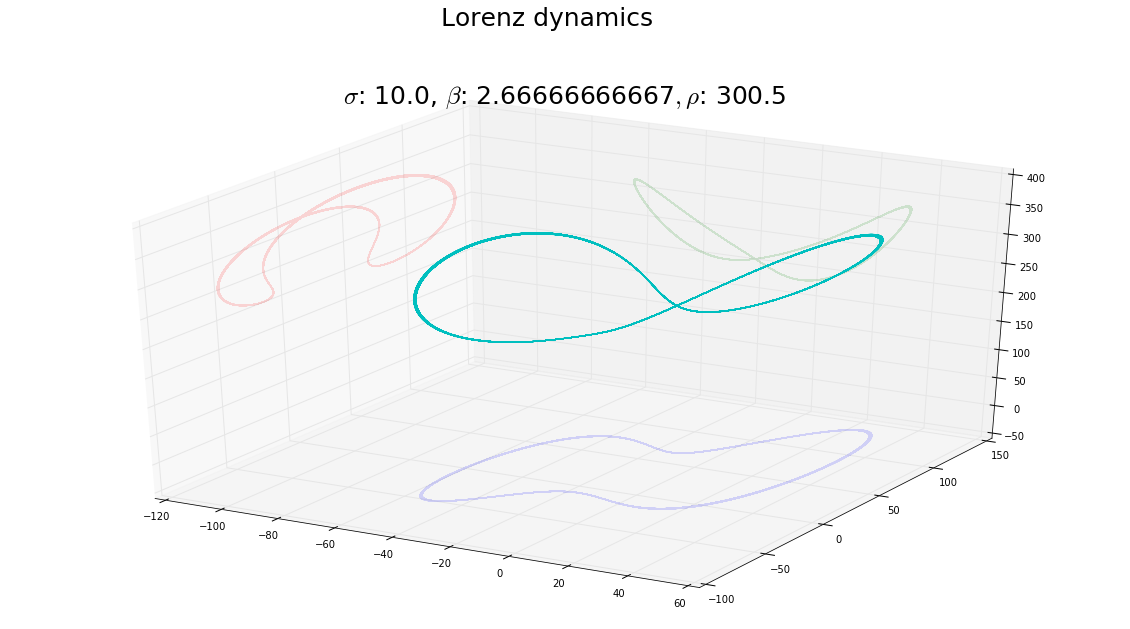

In [42]:
pz=len(tplt)*[-10.0]
px=len(tplt)*[-105.0]
py=len(tplt)*[105.0]

print len(pz), len(tplt)
#raw_input()
import matplotlib as mpl
import six
from mpl_toolkits.mplot3d import Axes3D
import six
#import numpy as np
#import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

st = fig.suptitle("Lorenz dynamics", fontsize=25)
plt.title("$\sigma$: "+str(sigma)+", $\\beta$: "+str(beta)+"$, \\rho$: "+str(rho),fontsize=25)
#plt.plot(xplt, yplt, zplt)
plt.plot(xplt, yplt, pz,alpha=0.15 )
plt.plot(xplt, py , zplt, alpha=0.15 )
plt.plot(px, yplt , zplt,alpha=0.15 )
plt.plot(xplt, yplt, zplt)
#ax.legend()
fig.savefig('xyznochaos.png',format='png',dpi=600, bbox_inches='tight')